## 1. Reading in Dataset

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [47]:
# Read in data through url on Github
url = 'https://raw.githubusercontent.com/xinegan88/some_files/master/master_df.csv'
df_x = pd.read_csv(url)

In [3]:
df = df_x.copy()

In [4]:
df.head()

,Year,Title,TheatricalDistributor,Genre,Source,ProductionMethod,CreativeType,Budget,DomesticGross,InternationalGross,WorldwideGross,NetProfits,roi
0,2010,Toy Story 3,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,200000000,415004880,653874642,1068879522,868879522,4.0
1,2010,Alice in Wonderland,Walt Disney,Adventure,Based on Fiction Book/Short Story,Animation/Live Action,Fantasy,200000000,334191110,691300000,1025491110,825491110,4.0
2,2010,Iron Man 2,Paramount Pictures,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,170000000,312433331,308723058,621156389,451156389,3.0
3,2010,The Twilight Saga: Eclipse,Summit Entertainment,Drama,Based on Fiction Book/Short Story,Live Action,Fantasy,68000000,300531751,405571077,706102828,638102828,9.0
4,2010,Harry Potter and the Deathly Hallows:…,Warner Bros.,Adventure,Based on Fiction Book/Short Story,Animation/Live Action,Fantasy,125000000,296131568,664297789,960429357,835429357,7.0


## 2. Three Questions and Visualizations
**For each of the questions below, we need to provide recommendation with a clear visualization to support it**

## 2.1 What kind of movie should we make?

### Recommendation:
Diversify projects between **low-risk/low-return films** (LR) and **high-risk/high-return** (HR) films.   
For HR films, the top genres with respect to profits are actions, adventures, and musicals (see heatmap)   
<br\>
For these kinds of films, Live Action/Animation Hybrids (Action and Adventure) and Animated (Musicals) seem to do well. (see boxplot1)   
<br\>
Superhero movies are a creative-type that increases the chances of success in this category.   
For LR filns, the top genres with respect to ROI are horror, thriller/suspense/, drama, and comedy. (see heatmap)   
For these kinds of films, live action is the best Production Method. (see boxplot)    


In [6]:
# what kind of movies have above average return on investment
x = df.roi.mean() # what is the average roi
print(x)
y = df[df.roi > x] # which movie genres have above average ROI
y.Genre.value_counts() 

4.7044989775051125


Drama                  55
Horror                 50
Comedy                 30
Thriller/Suspense      29
Adventure              27
Action                 24
Romantic Comedy         9
Black Comedy            7
Musical                 4
Concert/Performance     3
Western                 1
Documentary             1
Name: Genre, dtype: int64

#### Note:
It is clear from the subset of movies that have above averge ROI, that the following genres are over-represented: Drama, Horror, Comedy, Thriller/Suspense, Adventure, and Action.   
<br\>
We are including musicals in our recommendations because despite the margins being small, the actual profits are so large that they generate substantial revenue. (see heatmap)    

In [7]:
hr_df = df[df.Genre.isin(['Adventure','Action','Musical'])].sort_values(by = 'roi', ascending = False) # data set of  hr/hr movies

In [8]:
lr_df = df[df.Genre.isin(['Drama','Horror','Comedy','Thriller/Suspense'])].sort_values(by = 'roi', ascending = False) # data set of lr/lr

### 2.1.1 Heatmap 
Three heatmaps are created to get a overlook at the revenue, net profit as well as roi for each year. 

In [9]:
#Heat Map: 
#Producing a pivot tables for the heatmap

# 1st pivot table for overall annual average Revenue by Genre
genre_pivot = pd.pivot_table(df, values='WorldwideGross', index=['Genre'],
                    columns=['Year'], aggfunc=np.mean).fillna(0)
# Change the number to millions
for i in range(2010,2020):
    genre_pivot[i] = genre_pivot[i].apply(lambda x: "{:.2f}".format(x/1000000)).astype(float)


# 2nd Pivot table for overall annual average Net Profit by Genre
group_genre_profit = pd.pivot_table(df, values='NetProfits', index=['Genre'],
                    columns=['Year'], aggfunc='mean').fillna(0)

# Change the number to millions
for i in range(2010,2020):
    group_genre_profit[i] = group_genre_profit[i].apply(lambda x: "{:.2f}".format(x/1000000)).astype(float)

# 3rd Pivot table for genre, ROI means
group_genre_roi = pd.pivot_table(df, values='roi', index=['Genre'], columns=['Year'], aggfunc='mean').fillna(0)   

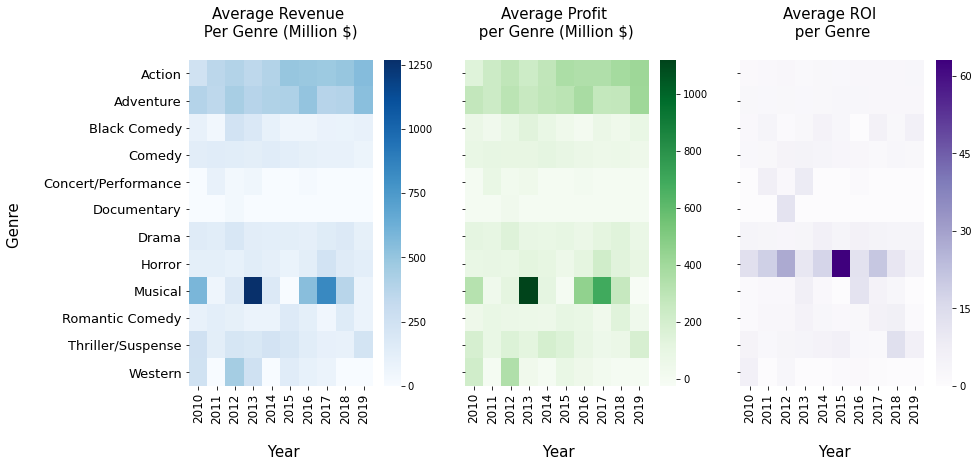

In [10]:
## Producing Heatmap to look at the average Revenue, Net Profit, and ROI

# Creating three subplots

f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,6), sharey=True)


# Genre and overall revenue average
r1 = sns.heatmap(genre_pivot, cmap='Blues', ax=ax1)
r1.set_title("Average Revenue \n Per Genre (Million $) \n", fontsize=15)
r1.tick_params(axis='y', labelsize=13)
r1.tick_params(axis='x', labelsize=12)
r1.set_ylabel('Genre \n', fontsize=15)
r1.set_xlabel('\n Year', fontsize=15)


# Genre and overall profit average
r2 = sns.heatmap(group_genre_profit, cmap='Greens', ax=ax2)
r2.set_title("Average Profit \n per Genre (Million $) \n", fontsize=15)
r2.set_ylabel("")
r2.set_xlabel('\n Year', fontsize=15)
r2.tick_params(axis='x', labelsize=12)

# Genre and overall ROI average
r3 = sns.heatmap(group_genre_roi, cmap='Purples', ax=ax3)
r3.set_title("Average ROI \n per Genre \n", fontsize=15)
r3.set_ylabel("")
r3.set_xlabel('\n Year', fontsize=15)
r3.tick_params(axis='x', labelsize=12)

### 2.1.2 Boxplots
We are creating boxplots here to see the distribution of profits, revenues, and rois of different genres and production methods

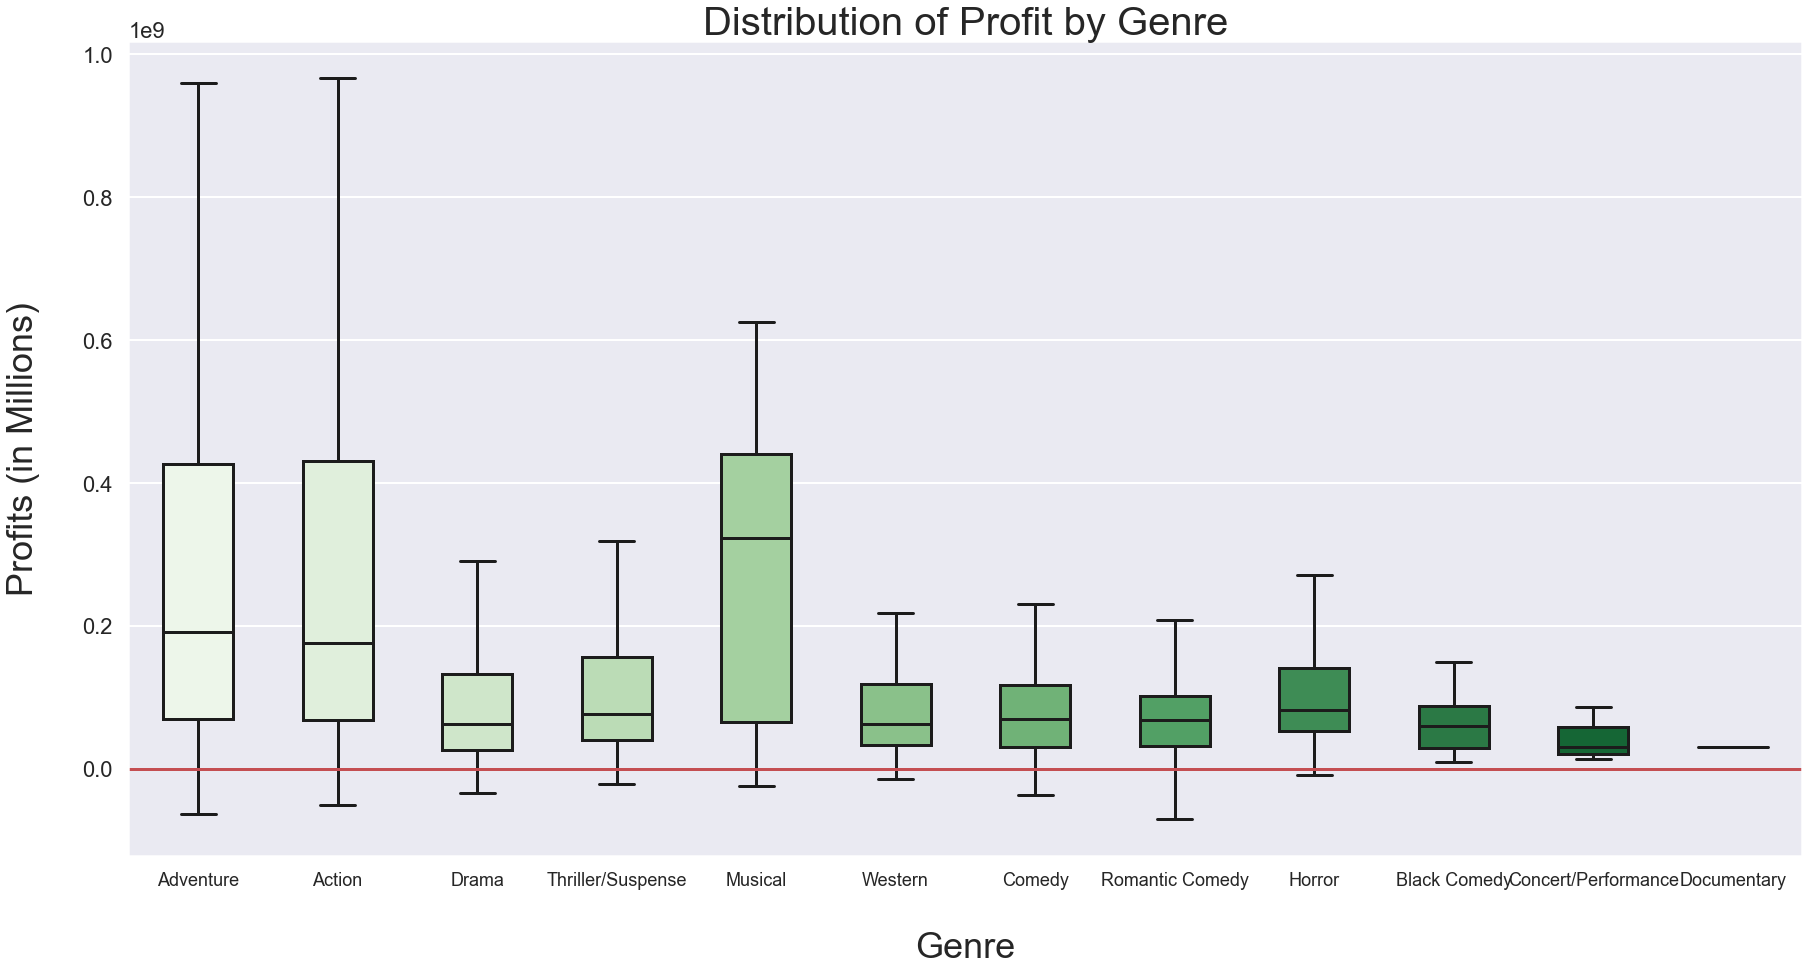

In [11]:
# Boxplot for profit for all genres
sns.set(rc={'figure.figsize':(12,9)})
sns.set_context('poster')
sns.set_style('darkgrid')

plt.figure(figsize=(30,15))
plt.title("Distribution of Profit by Genre", size=40)

ax = sns.boxplot(x="Genre", y="NetProfits",data=df, palette='Greens', 
                 showfliers=False, width=0.5)
ax.tick_params(axis="x", labelsize=18)
ax.set_ylabel("Profits (in Millions)\n", fontsize=36)
ax.set_xlabel("\nGenre", fontsize=36)


# Creating a red line to show the breakeven point
x_coordinates = [-0.5, 11.5]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, color='r')

#### Note:
In the boxplot above, **Adventure**, **Action**, and **Musical** demonstrates a broad range of profits as well higher profit.

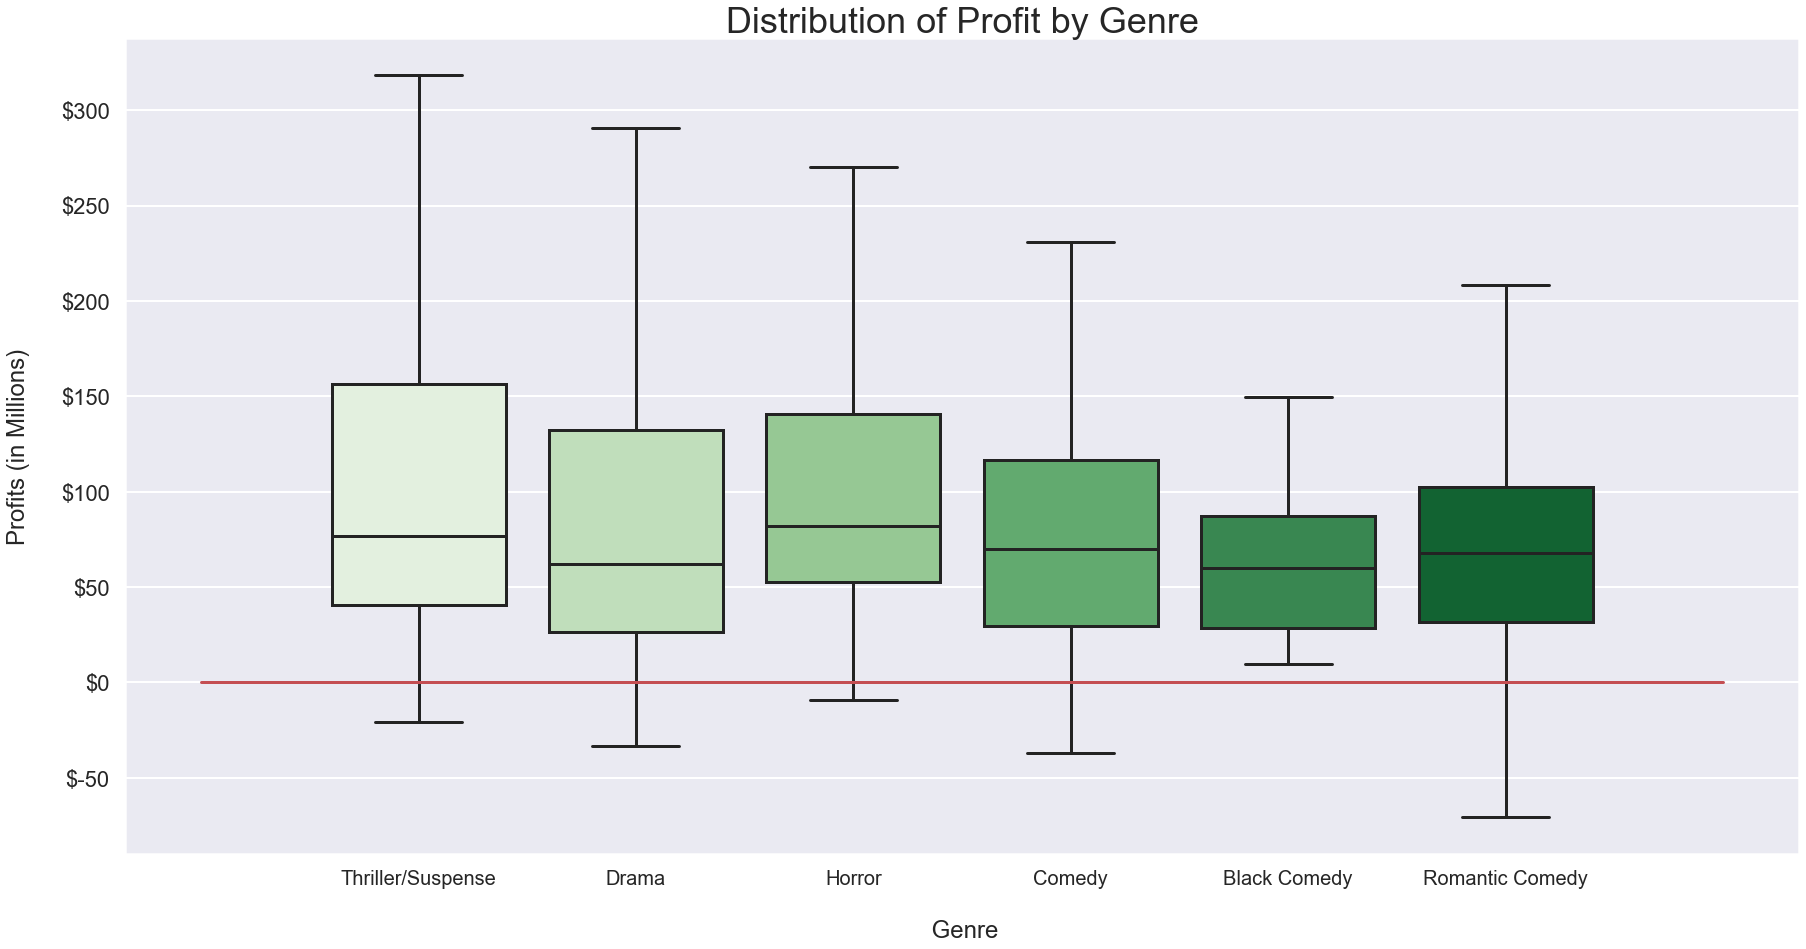

In [12]:
# Boxplot for Revenues for Lower Risk Genres
df_steady = df.sort_values(by=['NetProfits'], ascending=0)
df_steady = df_steady[df_steady.Genre.isin(["Thriller/Suspense", "Drama", "Horror",'Comedy','Black Comedy', 'Romantic Comedy'])]


def to_million(x, pos):    
    return '$%1.0f' % (x*1e-6)

sns.set_context('poster')
plt.figure(figsize=(30,15))
plt.title("Distribution of Profit by Genre", size=36)
ax = sns.boxplot(x="Genre", y="NetProfits", data=df_steady, palette='Greens', showfliers=False)
ax.tick_params(axis="x", labelsize=20)
ax.set_xlabel("\n Genre", size=24)
ax.set_ylabel("Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax.yaxis.set_major_formatter(format_y)
x_coordinates = [-1, 6]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, color='r')

#### Note:
The above graph shows the revenue range within the lower risk genres. Their 25% to 75% are in pretty similar ranges.

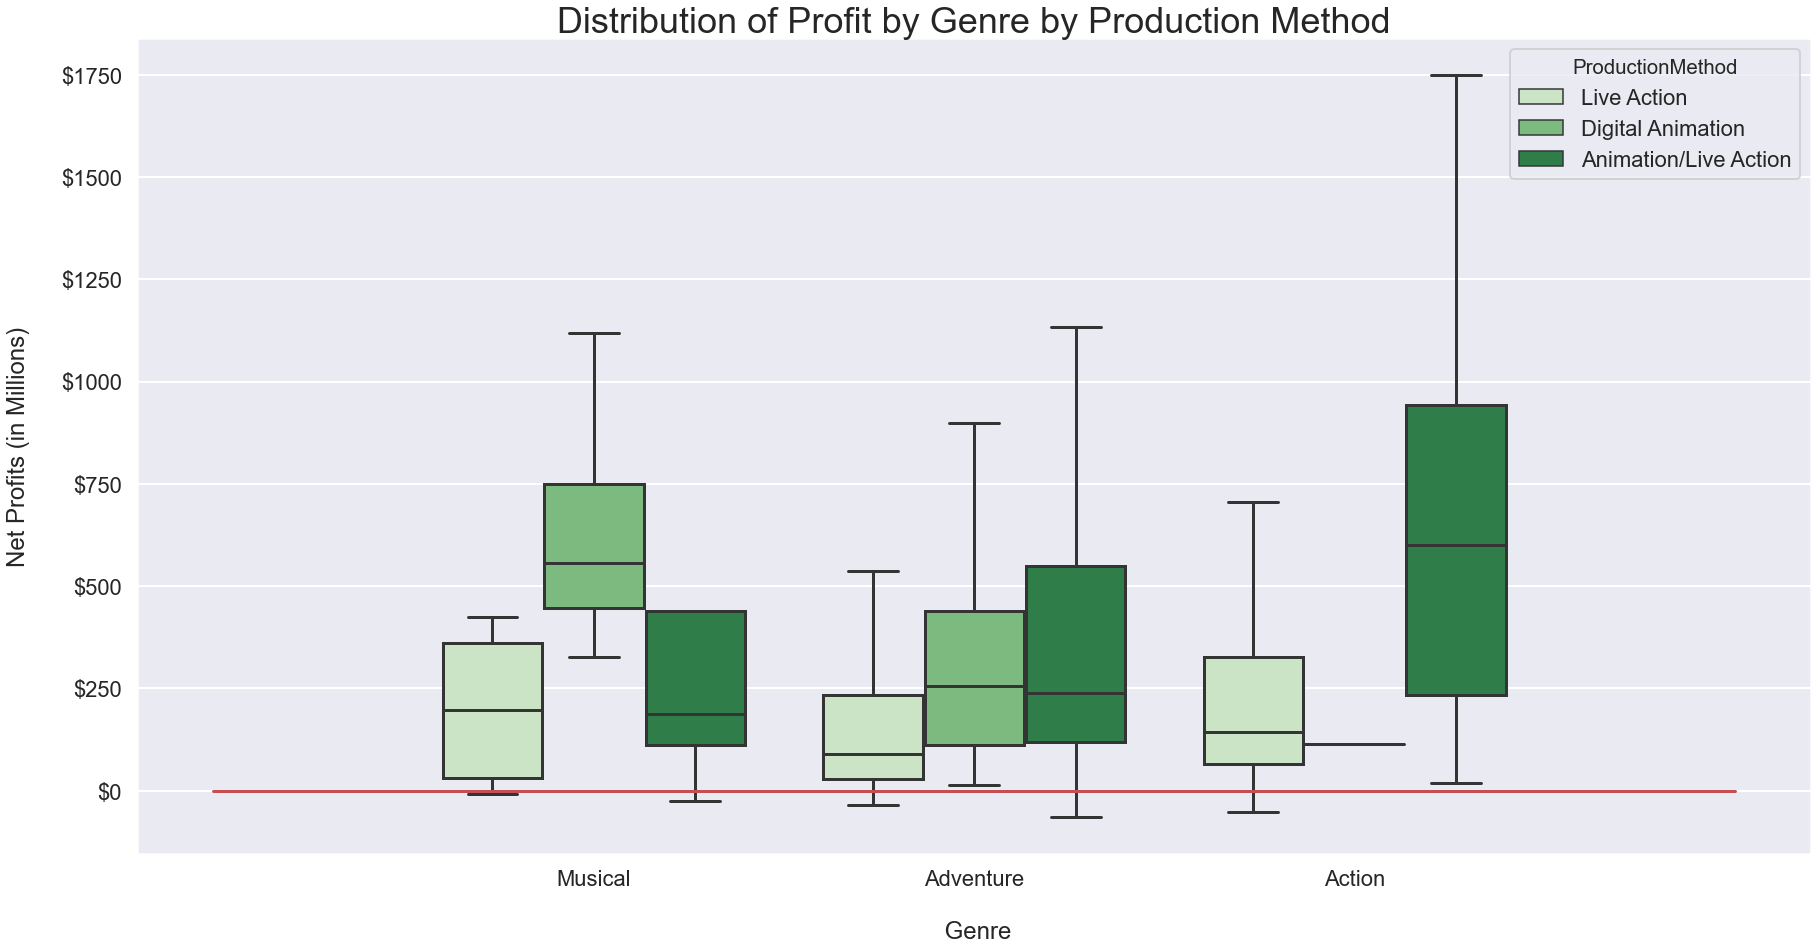

In [13]:
# Boxplot for Profit based on Production Method
sns.set_context('poster')
plt.figure(figsize=(30,15))
ax2 = sns.boxplot(x='Genre', y='NetProfits', hue='ProductionMethod', data=hr_df, palette='Greens', showfliers=False)
plt.title("Distribution of Profit by Genre by Production Method", size=36)
plt.xlabel("\n Genre", size=24)
plt.ylabel("Net Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
x_coordinates2 = [-1, 3]
y_coordinates2 = [0, 0]
plt.plot(x_coordinates2, y_coordinates2, color='r')

#### Note:
The above graph include the high risk genres and plots out the profit distribution based on different production methods. 

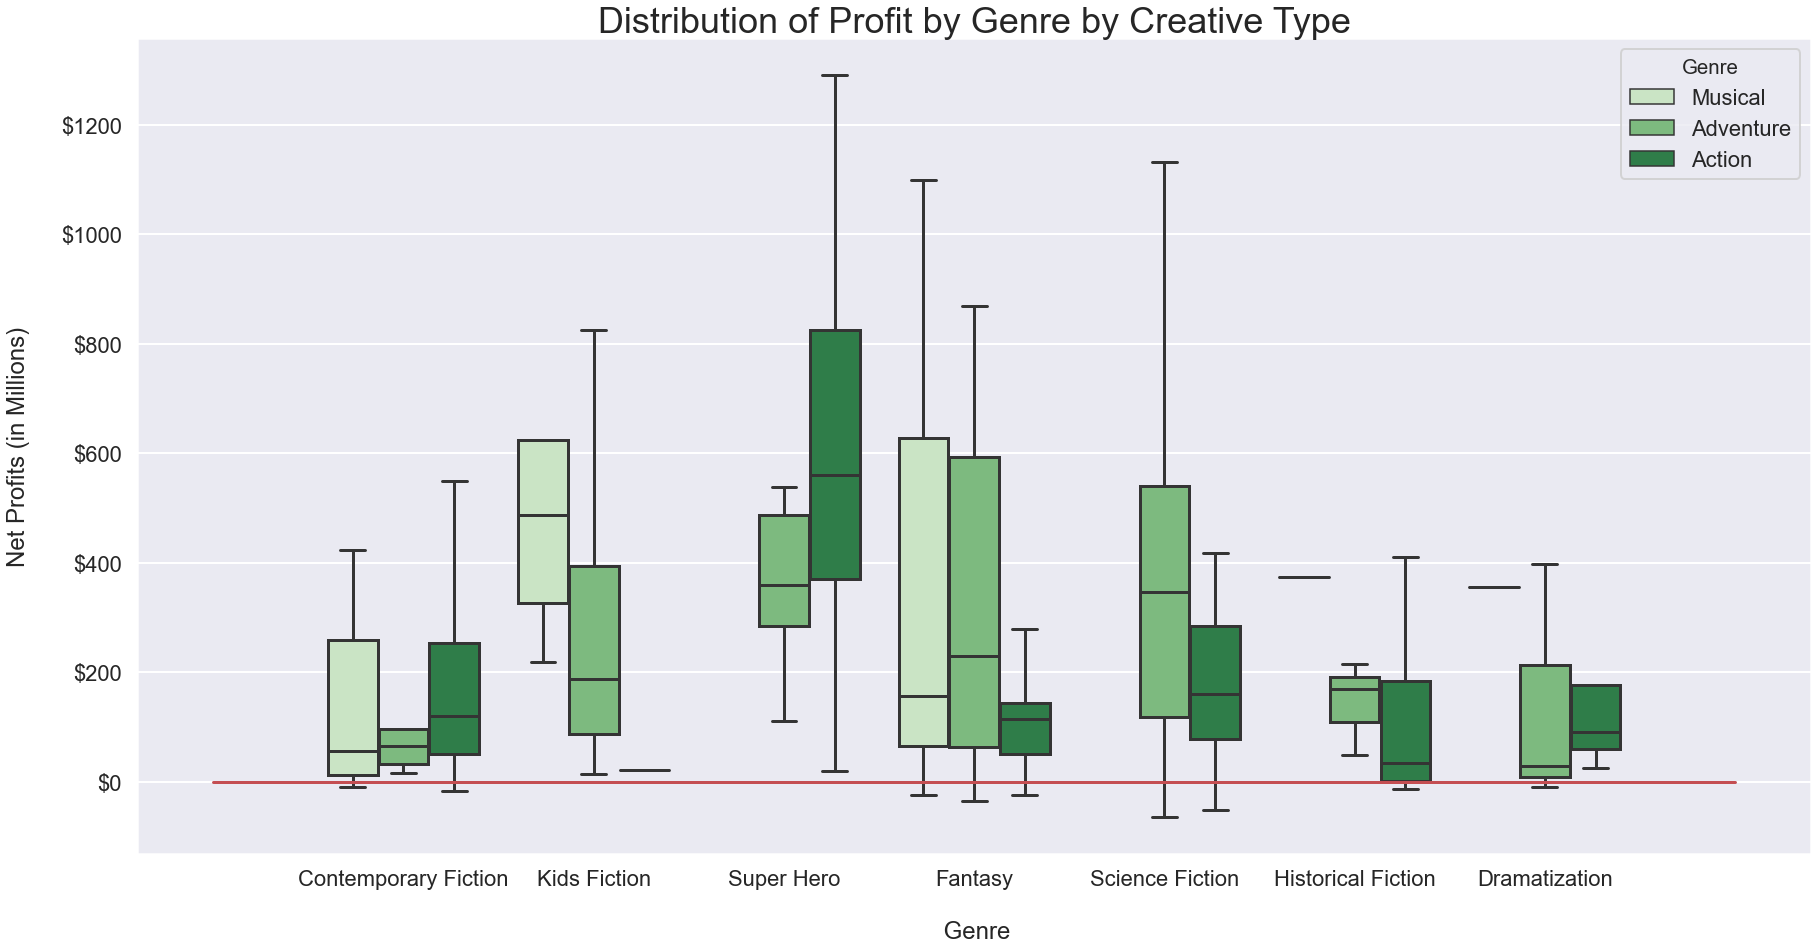

In [14]:
# Boxplot for Literatural Type, Production Method and Genre
sns.set_context('poster')
plt.figure(figsize=(30,15))
ax2 = sns.boxplot(x='CreativeType', y='NetProfits', hue='Genre', data=hr_df, palette='Greens', showfliers=False)
ax2.set_title("Distribution of Profit by Genre by Creative Type", size=36)
plt.xlabel("\n Genre", size=24)
plt.ylabel("Net Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
x_coordinates2 = [-1, 7]
y_coordinates2 = [0, 0]
plt.plot(x_coordinates2, y_coordinates2, color='r')

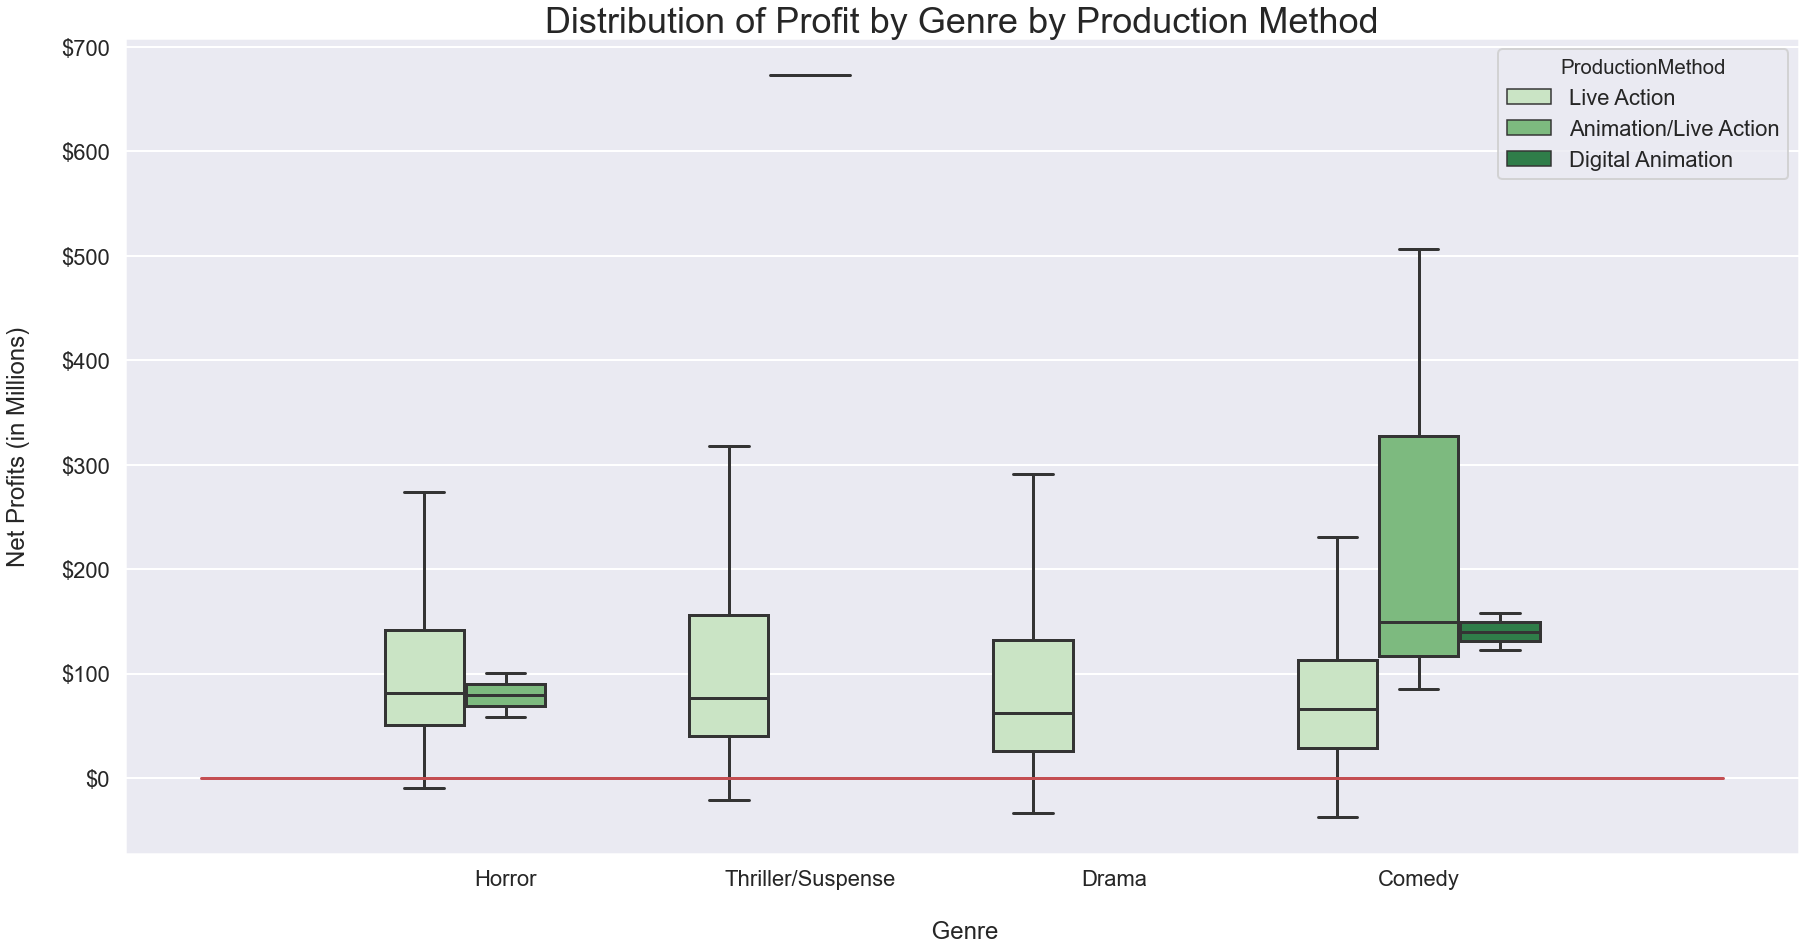

In [15]:
sns.set_context('poster')
plt.figure(figsize=(30,15))
ax2 = sns.boxplot(x='Genre', y='NetProfits', hue='ProductionMethod', data=lr_df, palette='Greens', showfliers=False)
plt.title("Distribution of Profit by Genre by Production Method", size=36)
plt.xlabel("\n Genre", size=24)
plt.ylabel("Net Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
x_coordinates2 = [-1, 4]
y_coordinates2 = [0, 0]
plt.plot(x_coordinates2, y_coordinates2, color='r')

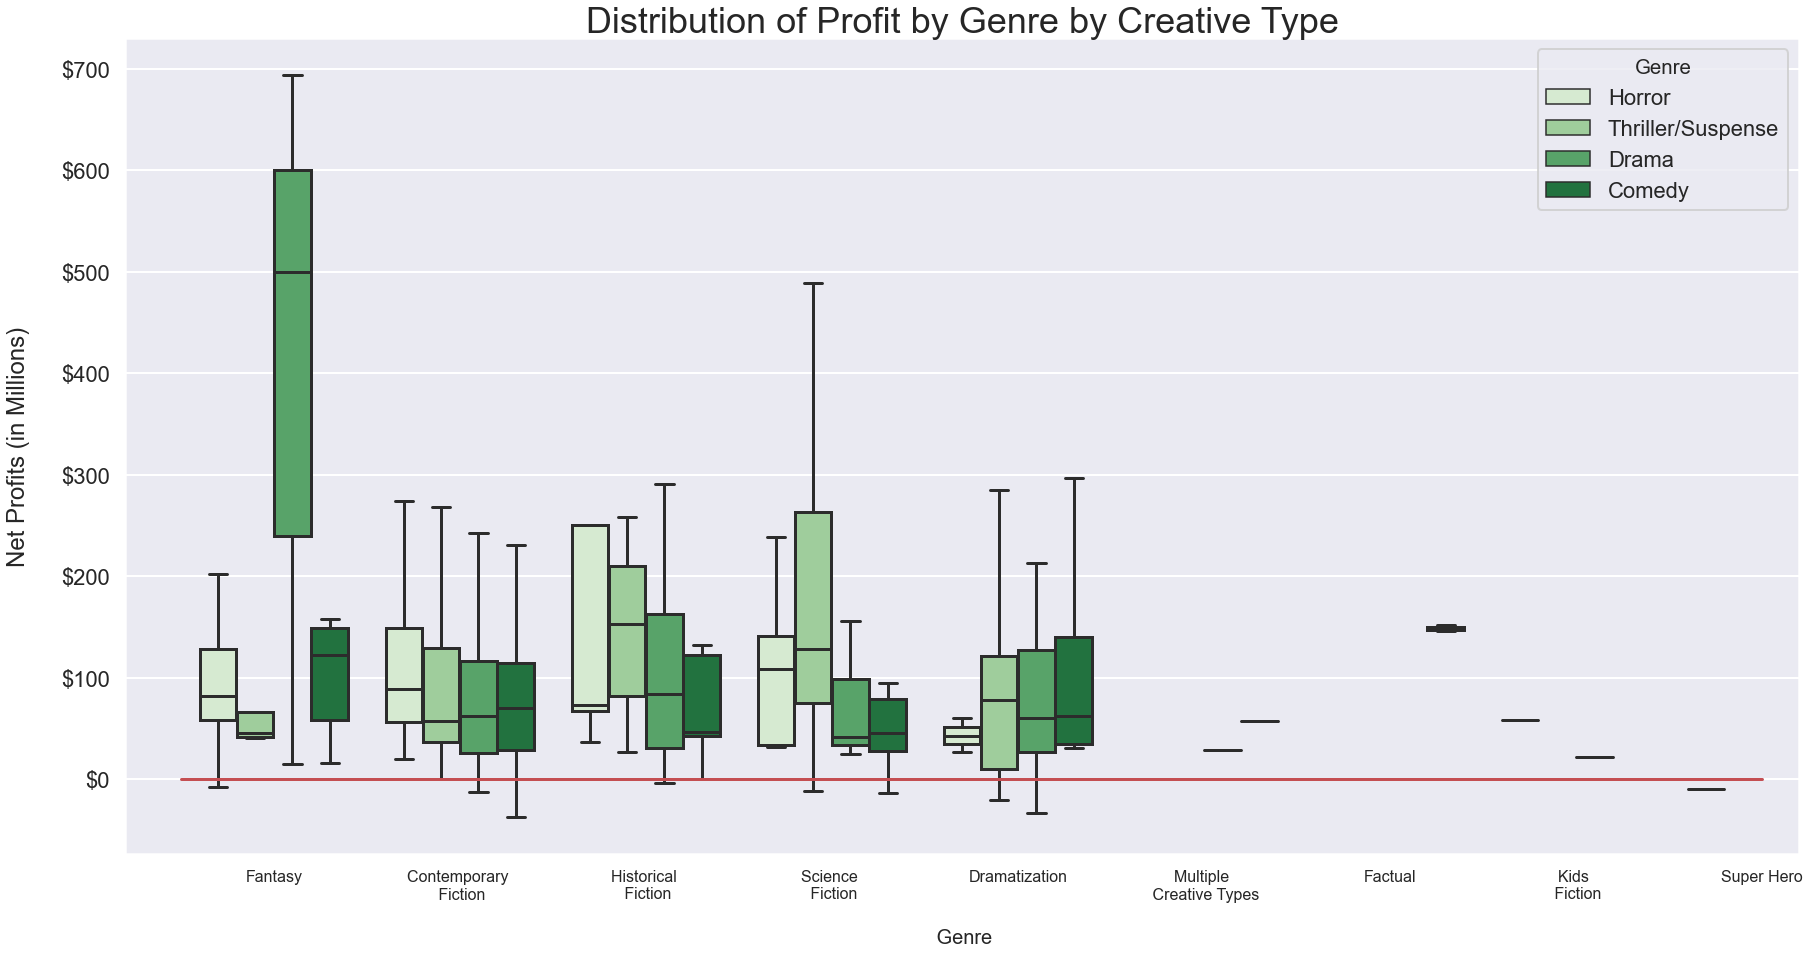

In [16]:
# we need to fix the Creative Types on the Y axis
#x = lr_df[lr_df.CreativeType != ['Multiple Creative Types','Factual','Kids Fiction','Super Hero']]
sns.set_context('poster')
plt.figure(figsize=(30,15))
ax2 = sns.boxplot(x='CreativeType', y='NetProfits', hue='Genre', data=lr_df, palette='Greens', showfliers=False)
plt.title("Distribution of Profit by Genre by Creative Type", size=36)
ax2.set_xlabel("\n Genre", size=20)
ax2.set_xticklabels(['Fantasy', 'Contemporary \n Fiction', 'Historical \n Fiction',
                    'Science \n Fiction', 'Dramatization', 'Multiple \n Creative Types', 
                     'Factual', 'Kids \n Fiction', 'Super Hero'
                    ], fontsize=16)
plt.ylabel("Net Profits (in Millions)\n", size=24)
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
x_coordinates2 = [-0.5, 8]
y_coordinates2 = [0, 0]
plt.plot(x_coordinates2, y_coordinates2, color='r')

**Observations:**   
action, adventure, and musicals consistently have the highest grosses and the highest profits  
however, it should also be noted that drama, thriller/suspense, horror, and comedy have consistently above average returns

## 2.2 How much should we spend?
In this section, we want to expore the economic indexes of movies in our different categories (i.e. High risk, low risk etc.)

In [28]:
# Excluding two outliers for better visualization of scatter plots
df_1 = df[(df.Title != 'The Gallows') & (df.Title != 'La La Land')]
hr_df = df_1[df_1.Genre.isin(['Adventure','Action','Musical'])].sort_values(by = 'roi', ascending = False)
lr_df = df_1[df_1.Genre.isin(['Drama','Horror','Comedy','Thriller/Suspense'])].sort_values(by = 'roi', ascending = False) # data set of lr/lr

In [29]:
hr_df[:20].Budget.mean() # the mean budget of the top 20 most profitable hr movies

84300000.0

In [30]:
hr_df[:20].roi.mean() # on average, hr make ~9x their production budget

9.3

In [31]:
lr_df[:20].Budget.mean() # the mean budget of the top 20 most profitable hr movies

4141500.0

In [32]:
lr_df[:20].roi.mean() # on average, hr_df make ~45.75x their production budget

45.75

In [33]:
hr_df[:20].WorldwideGross.mean()

808530203.05

In [34]:
lr_df[:20].WorldwideGross.mean()

156483663.25

In [35]:
hr_df[:20].NetProfits.mean()

724230203.05

In [36]:
lr_df[:20].NetProfits.mean()

152342163.25

## 2.2.1 Investment and Return Corelations 

Text(0, 0.5, 'ROI')

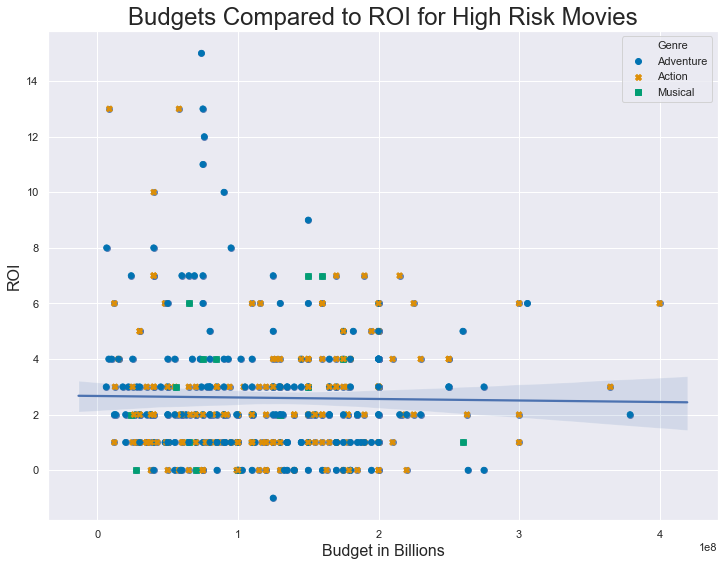

In [38]:
# Budget and ROI scattor plot (high risk movies)
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.regplot(x="Budget", y="roi", data= hr_df)
sns.scatterplot(x='Budget' , y='roi', hue='Genre', palette = 'colorblind', marker = '+', style = 'Genre', sizes=(100,200,100), data = hr_df)
plt.title("Budgets Compared to ROI for High Risk Movies", size=24)
plt.xlabel("Budget in Billions", size=16)
plt.ylabel("ROI", size=16)

Text(0, 0.5, 'Net Profits in Billions')

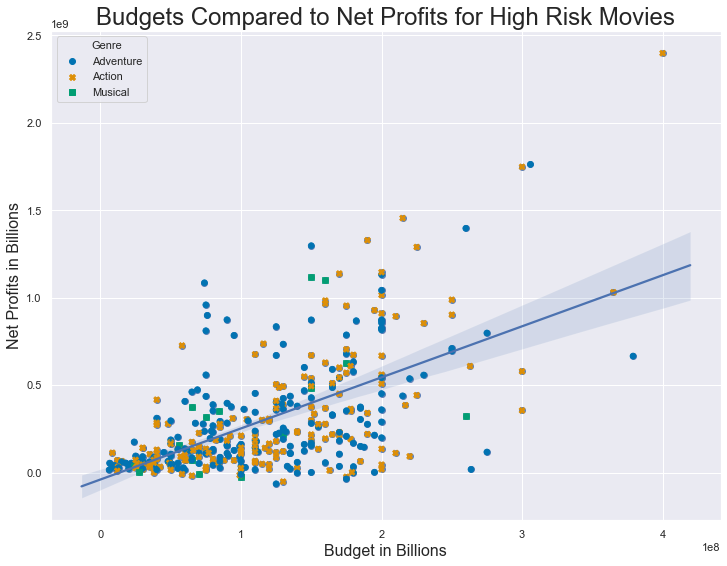

In [39]:
# Budget and Profit scattor plot (high risk movies)
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.regplot(x="Budget", y="NetProfits", data= hr_df)
sns.scatterplot(x='Budget' , y='NetProfits', hue='Genre', palette = 'colorblind', marker = '+', style = 'Genre', sizes=(100,200,100), data = hr_df)
plt.title("Budgets Compared to Net Profits for High Risk Movies", size=24)
plt.xlabel("Budget in Billions", size=16)
plt.ylabel("Net Profits in Billions", size=16)

Text(0, 0.5, 'ROI')

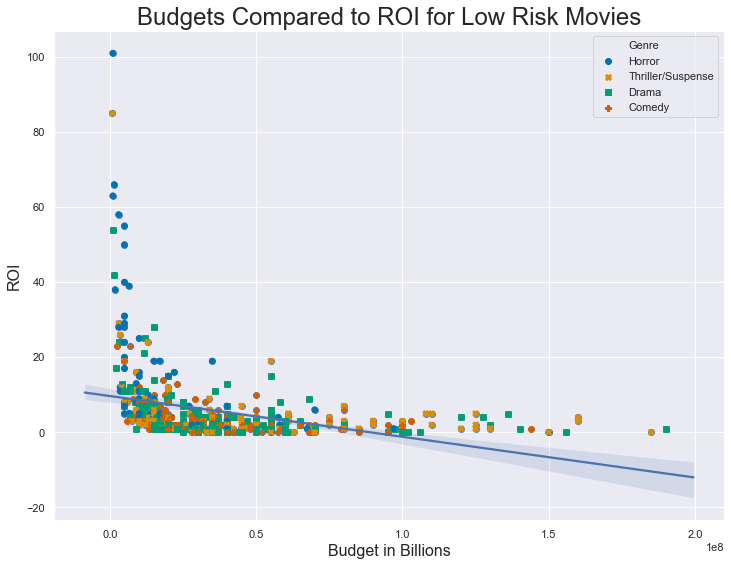

In [40]:
# Budget and ROI scattor plot (low risk movies)
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.regplot(x="Budget", y="roi", data= lr_df)
sns.scatterplot(x='Budget' , y='roi', hue='Genre', palette = 'colorblind', marker = '+', style = 'Genre', sizes=(100,200,100), data = lr_df)
plt.title("Budgets Compared to ROI for Low Risk Movies", size=24)
plt.xlabel("Budget in Billions", size=16)
plt.ylabel("ROI", size=16)

Text(0, 0.5, 'Net Profits in Billions')

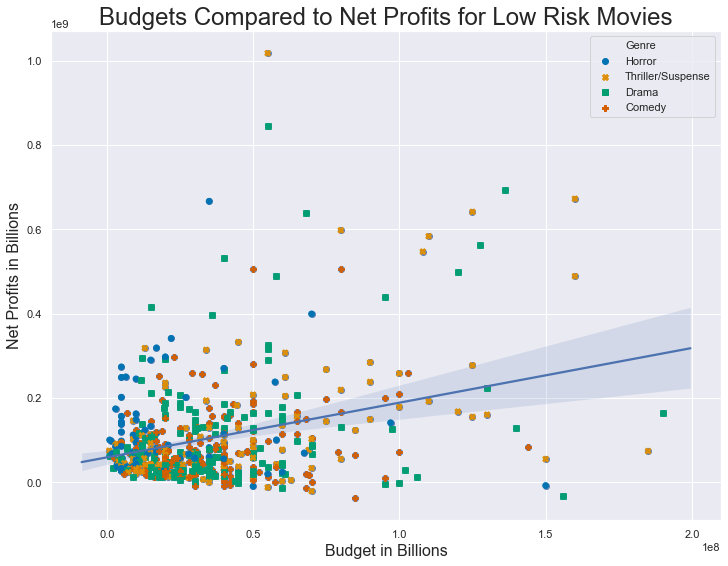

In [41]:
# Budget and Profit scattor plot (low risk movies)
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.regplot(x="Budget", y="NetProfits", data= lr_df)
sns.scatterplot(x='Budget' , y='NetProfits', hue='Genre', palette = 'colorblind', marker = '+', style = 'Genre', sizes=(100,200,100), data = lr_df)
plt.title("Budgets Compared to Net Profits for Low Risk Movies", size=24)
plt.xlabel("Budget in Billions", size=16)
plt.ylabel("Net Profits in Billions", size=16)

**Observations:**    
Trend line indicates no relationship between budget and ROI with HR movies...it seems like the investment of a movie does not always yield higher profit. 

Trend line indcates that as budget increases with LR movies, ROI tanks. 

However there is a correlation between budget and worldwide gross for both categories.

## 2.3 Who is winning in this category?
In this section, we want to look at the distributors that got most movies into the dataset, how their profit, revenue, and ROI looks like. 

## 2.3.1 General Comparison

In [48]:
# Product a table to get the average budget, revenue, profit and roi of each distributor
group = df.groupby(df.TheatricalDistributor)['Budget','WorldwideGross','NetProfits','roi'].mean()
count = df.groupby(df.TheatricalDistributor)['Title'].count()
combine = pd.merge(pd.DataFrame(group).reset_index(), 
                   pd.DataFrame(count).reset_index(), 
                  on='TheatricalDistributor').sort_values(by=['Title'], ascending=False)
combine.head()

,TheatricalDistributor,Budget,WorldwideGross,NetProfits,roi,Title
32,Warner Bros.,7.904375e+07,2.604351e+08,1.813914e+08,3.312500,160
26,Sony Pictures,5.981830e+07,2.078933e+08,1.480750e+08,3.716312,141
30,Universal,6.170985e+07,2.653352e+08,2.036254e+08,6.189394,132
0,20th Century Fox,7.830855e+07,2.675114e+08,1.892028e+08,2.863248,117
20,Paramount Pictures,8.129167e+07,2.596077e+08,1.783160e+08,5.010417,96


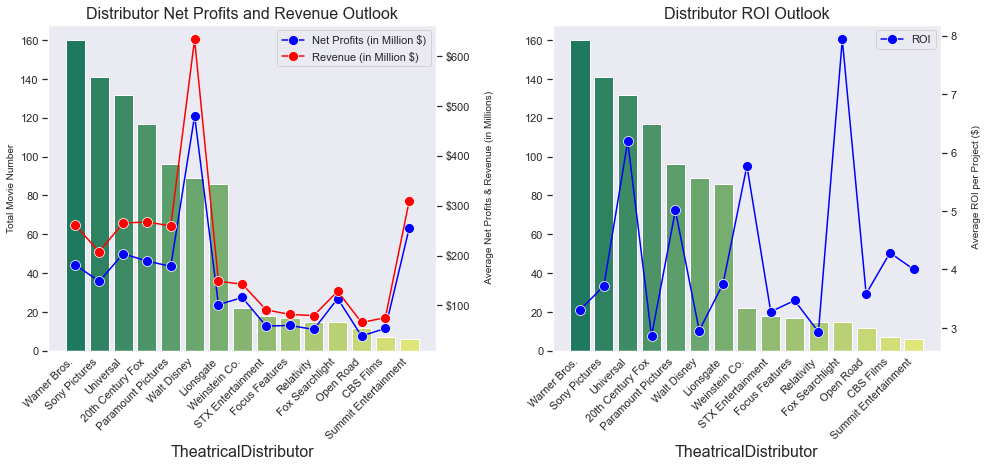

In [50]:
# Putting Total movie number, revenue, and net profits together
sns.set()
fig, (ax1, ax4) = plt.subplots(1,2,figsize=(16,6))
plt.subplots_adjust(wspace=0.3)


# Total Production number
ax1.set_title('Distributor Net Profits and Revenue Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='summer', 
                  label = 'Total Movie Number', ax=ax1)
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='NetProfits', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='TheatricalDistributor', y='WorldwideGross', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

# Second chart
# Number of counts
ax4.set_title('Distributor ROI Outlook', fontsize=16)
ax4.set_xlabel('\n Distributor Name', fontsize=16)
ax4 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='summer', 
                  label = 'Total Movie Number', ax=ax4)
ax4.tick_params(axis='x', rotation = 45, length=2)
ax4.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')
#ax4.get_yaxis().set_visible(False)
ax4.set_ylabel("\n")

# ROI per Distributor
ax5 = ax4.twinx()

ax5 = sns.lineplot(x='TheatricalDistributor', y='roi', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'ROI')
ax5.tick_params(axis='y')
ax5.set_ylabel('\n Average ROI per Project ($)', fontsize = 10)
ax5.set_xlabel('\n Distributor Name', fontsize=16)
ax4.grid(False)
ax5.grid(False)

#### Note:
According to this chart, Warner Brothers seems to have an advantage in the Low-Risk/Lower-Return segment of the market. They produced the highest number of successful films, while generating modest profits. Disney on the other hand, produced relatively few films (~40%) less films while achieving, the double the amount of profits that Warner Brothers did. 

Summit Entertainment, without having many productions got into the top films dataset, had high revenue as well as profit. 

On the other side, the ROI results show that distributor like Universal, Paramont, Weinstein, and Fox Searchlight has very high return on investment. Weinstein and Fox Searchlight, without high amount of profit, demonstrate high investment efficiency.

## 2.3.2 Competitive Distributors
In this section, we selected a few interesting distributors to look at how they are doing based on different genres.

In [51]:
# Making a smaller group 
group_genre = df.groupby(['TheatricalDistributor', 'Genre']).agg({"WorldwideGross": "mean", 
                                                                  "NetProfits": "mean",
                                                                 "Title": "count"})
genre_group_df = pd.DataFrame(group_genre).reset_index()
genre_topstudio = genre_group_df[genre_group_df.TheatricalDistributor.isin(['Warner Bros.', 
                                                                           'Sony Pictures',
                                                                           'Universal',
                                                                           '20th Century Fox',
                                                                           'Paramount Pictures',
                                                                           'Walt Disney',
                                                                            'Summit Entertainment'])]

genre_topstudio = genre_topstudio.sort_values(by = ['TheatricalDistributor', 'Title'], ascending=False)
genre_topstudio.head()

,TheatricalDistributor,Genre,WorldwideGross,NetProfits,Title
133,Warner Bros.,Comedy,1.298471e+08,8.900890e+07,34
130,Warner Bros.,Action,4.485057e+08,3.015057e+08,29
131,Warner Bros.,Adventure,3.837626e+08,2.555557e+08,29
134,Warner Bros.,Drama,1.333937e+08,8.746271e+07,29
135,Warner Bros.,Horror,2.618582e+08,2.328224e+08,14


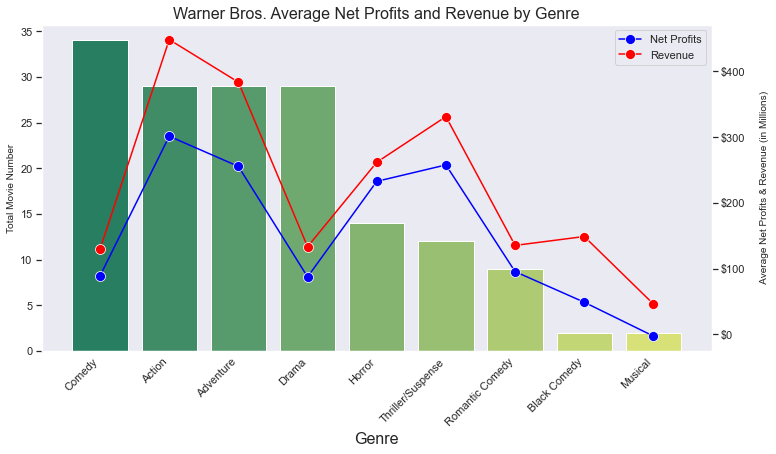

In [52]:
# Warner Bros. detailed graph
df_wb = genre_topstudio[genre_topstudio.TheatricalDistributor == 'Warner Bros.']


fig, ax1 = plt.subplots(figsize=(12,6))
# Total Production number

ax1.set_title('Warner Bros. Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_wb, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_wb, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_wb, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

#### Note: 
Warner Bros. covers many genres but shows more strength in Action, Adventure, Horror and Thrillers. 

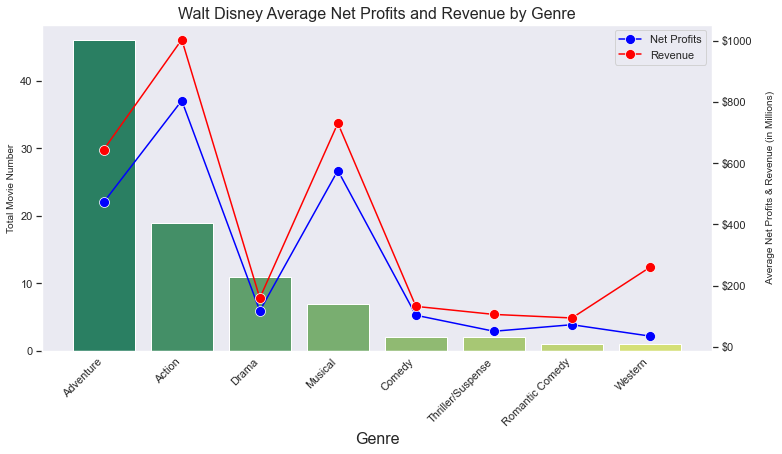

In [53]:
# Walt Disney detailed graph
df_wd = genre_topstudio[genre_topstudio.TheatricalDistributor == 'Walt Disney']


fig, ax1 = plt.subplots(figsize=(12,6))
# Total Production number

ax1.set_title('Walt Disney Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_wd, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_wd, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_wd, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

#### Note: 
Disney shows very good performance in Adventure, Action, and Musicals

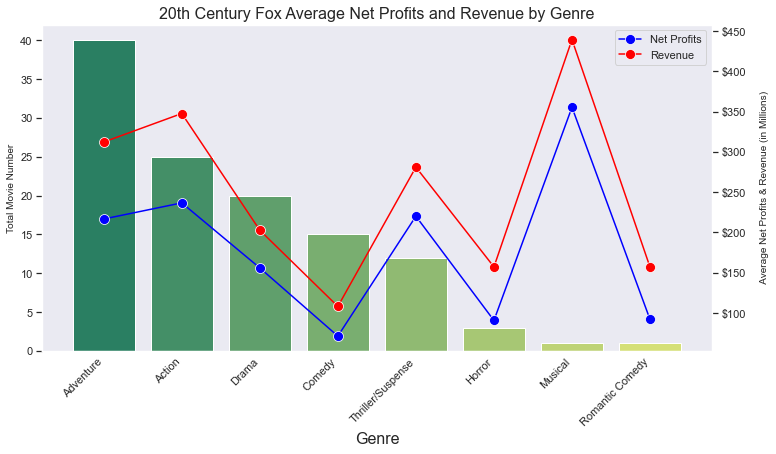

In [54]:
# 20th Century Fox detailed graph
df_cf = genre_topstudio[genre_topstudio.TheatricalDistributor == '20th Century Fox']


fig, ax1 = plt.subplots(figsize=(12,6))
# Total Production number

ax1.set_title('20th Century Fox Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_cf, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_cf, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_cf, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

ax2.legend(loc='upper right')
ax3.legend(loc='upper right')

#### Note:
20th Century Fox, with less genres covered, demonstrate very high performance in Musicals. 

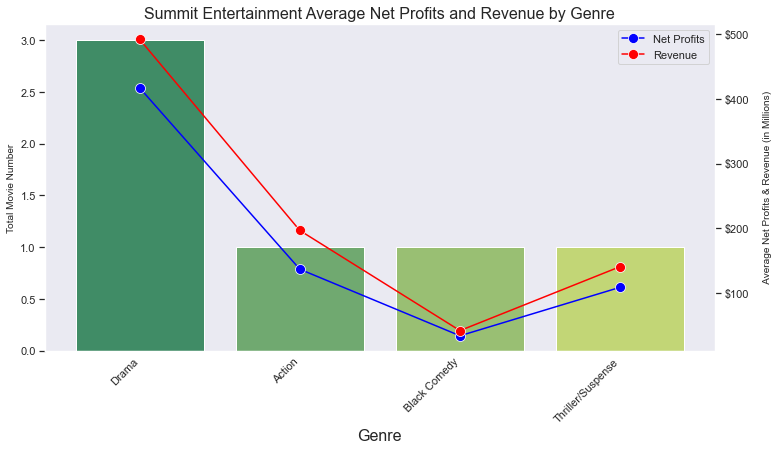

In [55]:
# 20th Century Fox detailed graph
df_se = genre_topstudio[genre_topstudio.TheatricalDistributor == 'Summit Entertainment']


fig, ax1 = plt.subplots(figsize=(12,6))
# Total Production number

ax1.set_title('Summit Entertainment Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_se, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_se, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_se, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

#### Note:
With only four genres and less films on the top list, Summit Entermainment demonstrated good performances. They are more specialized in Dramas. 

#### Observation: 
We can the selected 4 distributors all have their own strenghs on producing certain genres. Therefore, when Microsoft is working on different genres for investment, they can learn from the different studios about their strategies and successful experiences. 